# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [22]:
#Seu código aqui para a média
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)
media_por_categoria

,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [18]:
#Seu código aqui para a mediana
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)
mediana_por_categoria

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias:

Categorias acima da mediana: lacteos, congelados, belleza-y-cuidado-personal, frutas, verduras, instantaneos-y-sopas
Categorias abaixo da mediana: comidas-preparadas

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [21]:
#Seu código aqui
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)
desvio_padrao_por_categoria

,Categoria,Preco_Normal
5,lacteos,3925.816164
0,belleza-y-cuidado-personal,2210.041719
2,congelados,2111.539896
1,comidas-preparadas,2019.911428
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
6,verduras,1012.699625


Digite nesse campo o comportamento que você identificou.

A media da categoria de 'congelados', 'belleza-y-cuidado-personal' e 'lacteos' são maiores que a mediana, e o desvio padrão bem altos. Portanto, temos valores distoantes de alto preço comparados aos produtos mais comuns. Principalmente a categoria 'lacteos', que tem uma media consideravelmente bem maior que a mediana.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

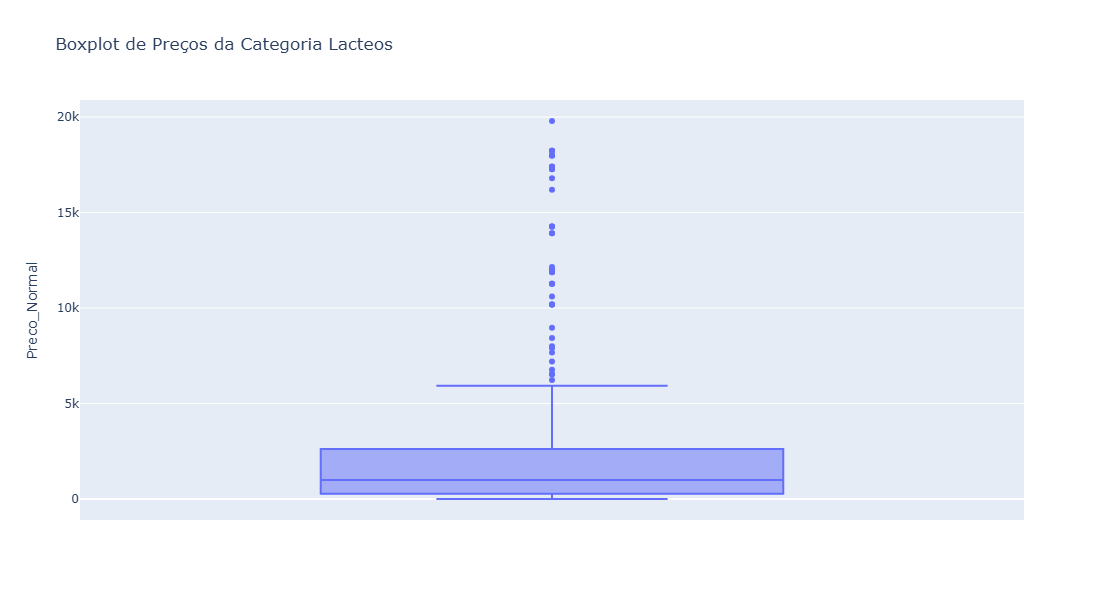

In [40]:
#Seu código aqui

dados_categoria_lacteos = df.loc[df['Categoria'] == 'lacteos']
# dados_categoria_lacteos

fig = px.box(dados_categoria_lacteos, y='Preco_Normal', title='Boxplot de Preços da Categoria Lacteos', height=600)
fig.show()

Notamos um boxplot bem enxuto na faixa de preços entre 269 e 2619, sendo o limite superior em 5934. Temos diversos pontos acima deste limite superior, contendo vários outliers em relação aos outros produtos mais próximos da media 989.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

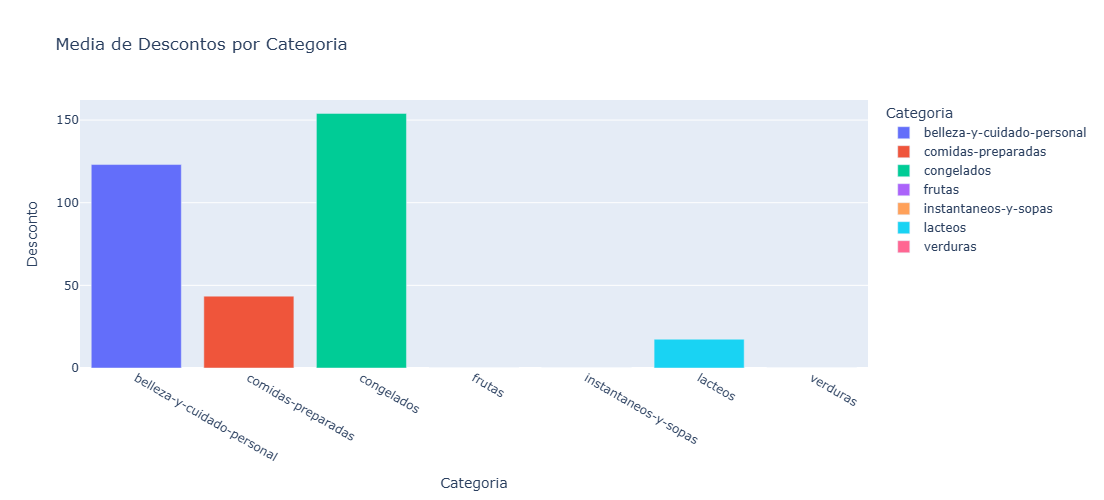

In [54]:
# Seu código aqui
# df.loc[df['Desconto'] > 0]
dados_media_descontos_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()
# dados_media_descontos_por_categoria.loc[dados_media_descontos_por_categoria['Desconto'] > 0]

fig = px.bar(dados_media_descontos_por_categoria, x='Categoria', y='Desconto', color='Categoria', title='Media de Descontos por Categoria', height=500)

fig.show()

É interessante notar um detalhe. Lacteos que tem uma maior variedade de preços em relação a média, com muito mais outliers, quase não tem desconto algum. Pode ser uma categoria com pouca margem? Ou talvez uma categoria com alta margem de lucro?

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

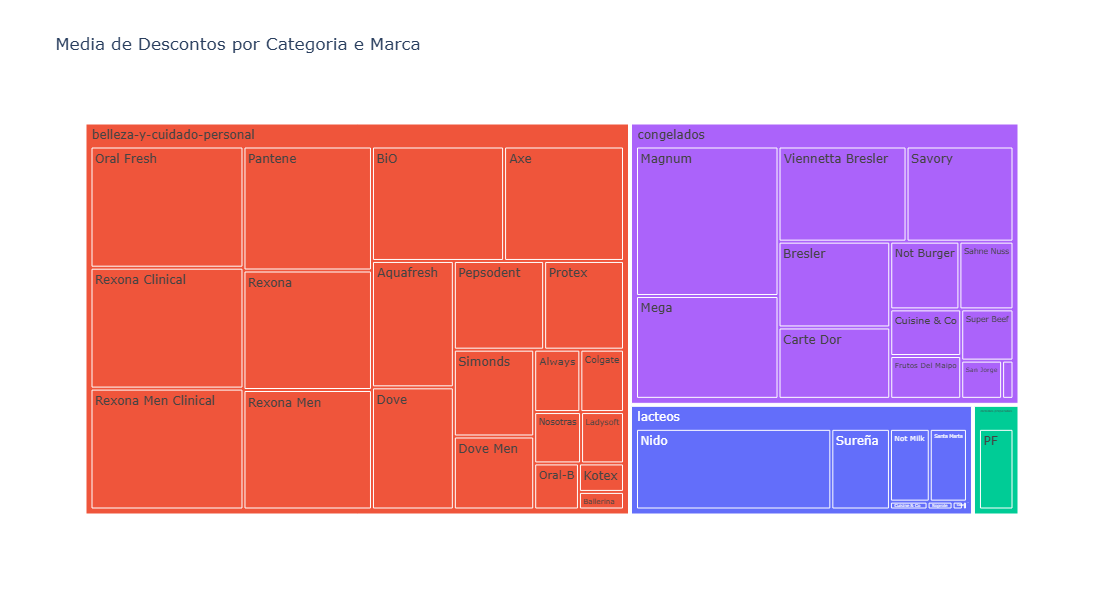

In [62]:
# Seu código aqui
# # Agrupando salário profissao e estado civil
#     salario_por_profissao_estado_civil = df.groupby(['Profissão', 'Estado Civil'])['Salário'].mean().reset_index()

# # Criando o gráfico
# fig = px.treemap(salario_por_profissao_estado_civil, 
#                  path=['Profissão', 'Estado Civil'],
#                  values='Salário',
#                  title='Salários por Profissão e Estado Civil',
#                  color='Estado Civil')

# fig.show()

categoria_marca_por_media_desconto = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()
# categoria_marca_por_media_desconto

fig = px.treemap(categoria_marca_por_media_desconto,
                path=['Categoria', 'Marca'],
                values='Desconto',
                title='Media de Descontos por Categoria e Marca',
                color='Categoria',
                height=600)

fig.show()